In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import matplotlib.ticker as mtick
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
mouse_clinical = pd.merge(clinical_trial_df,mouse_drug_df, on = "Mouse ID", how = "left")
# Display the data table for preview
mouse_clinical.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean = mouse_clinical.loc[:, ['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
mean = mean.groupby(['Drug', 'Timepoint']).mean()
# Convert to DataFrame
mean_volume_df = pd.DataFrame(mean).reset_index(inplace=False)

# Preview DataFrame
mean_volume_df.head(11)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = mouse_clinical.loc[:, ['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
standard_error = standard_error.groupby(['Drug', 'Timepoint']).sem().unstack(0)

# Convert to DataFrame
re_standard_error = standard_error['Tumor Volume (mm3)']
re_standard_error = pd.DataFrame(re_standard_error)
# standard_error_df = pd.DataFrame(standard_error).reset_index(inplace=False)
re_standard_error

# Preview DataFrame
# standard_error_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [4]:
# Minor Data Munging to Re-Format the Data Frames

Minor_Data = mean.unstack(0)
re_format_data = Minor_Data['Tumor Volume (mm3)']
re_format_data_df = pd.DataFrame(re_format_data).reset_index(inplace=False)
# Preview that Reformatting worked

re_format_data_df
Minor_Data

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [5]:
# Generate the Plot (with Error Bars)
re_format_data.columns
# Save the Figure


Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

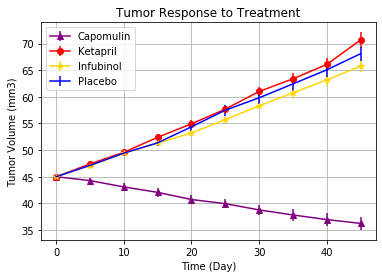

In [6]:
plt.errorbar(re_format_data_df['Timepoint'], re_format_data_df['Capomulin'], yerr = re_standard_error['Capomulin'],marker = "^", color = "purple", label = "Capomulin")
plt.errorbar(re_format_data_df['Timepoint'], re_format_data_df['Ketapril'], yerr = re_standard_error['Ketapril'], marker = "o", color = "red", label ="Ketapril" )
plt.errorbar(re_format_data_df['Timepoint'], re_format_data_df['Infubinol'], yerr = re_standard_error['Infubinol'], marker = "*", color = "gold", label = "Infubinol")
plt.errorbar(re_format_data_df['Timepoint'], re_format_data_df['Placebo'], yerr = re_standard_error['Placebo'], marker = "", color = "blue", label = "Placebo")
plt.title("Tumor Response to Treatment")
plt.legend(loc = "upper left")
plt.xlabel("Time (Day)")
plt. ylabel("Tumor Volume (mm3)")
plt.grid()


plt.savefig('Tumor_Response_to_Treatmen.png')

In [7]:
# Show the Figure
plt.show('Tumor_Response_to_Treatmen.png')

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_data = mouse_clinical.loc[:, ['Drug', 'Timepoint', 'Metastatic Sites']]
# Convert to DataFrame
metastatic_data = metastatic_data.groupby(['Drug', 'Timepoint']).mean()
metastatic_data = metastatic_data['Metastatic Sites'].unstack(0)
metastatics_data = metastatic_data
metastatic_data = metastatic_data.reset_index(inplace = False)
# Preview DataFrame
metastatics_data

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_error = mouse_clinical.loc[:, ['Drug', 'Timepoint', 'Metastatic Sites']]
met_error = met_error.groupby(['Drug', 'Timepoint']).sem().unstack(0)
mets_error = met_error
met_error = met_error['Metastatic Sites'].reset_index(inplace=False)
# Convert to DataFrame

# Preview DataFrame
mets_error.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10                0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15                0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20                0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378

In [10]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
mets_error.head()


Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10                0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15                0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20                0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378

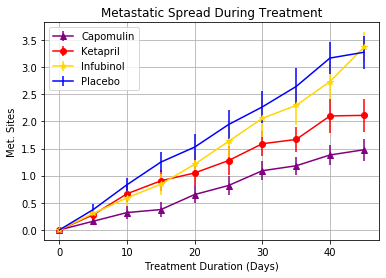

In [11]:
# Generate the Plot (with Error Bars)
plt.errorbar(metastatic_data['Timepoint'], metastatic_data['Capomulin'], yerr = met_error['Capomulin'],marker = "^", color = "purple", label = "Capomulin")
plt.errorbar(metastatic_data['Timepoint'], metastatic_data['Infubinol'], yerr = met_error['Infubinol'], marker = "o", color = "red", label ="Ketapril" )
plt.errorbar(metastatic_data['Timepoint'], metastatic_data['Ketapril'], yerr = met_error['Ketapril'], marker = "*", color = "gold", label = "Infubinol")
plt.errorbar(metastatic_data['Timepoint'], metastatic_data['Placebo'], yerr = met_error['Placebo'], marker = "", color = "blue", label = "Placebo")
plt.title("Metastatic Spread During Treatment")
plt.legend(loc = "Upper Left")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid()
# Save the Figure
plt.savefig('Metastatic_Spread_During_Treatment.png')
# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival = mouse_clinical.loc[:, ["Mouse ID", "Timepoint", "Drug"]]
survival = survival.groupby(['Drug','Timepoint']).count()
survivals = survival
survival = survival['Mouse ID'].unstack(0).reset_index(inplace = False)

# Convert to DataFrame

# Preview DataFrame
survivals.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [13]:
# Minor Data Munging to Re-Format the Data Frames
survi = survivals.unstack(0)
# Preview the Data Frame
survi = survi['Mouse ID']


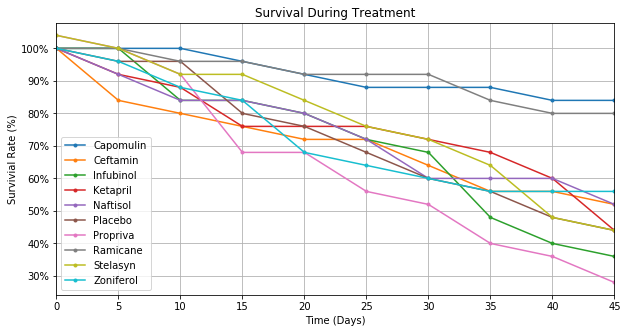

In [14]:
ax = survi.plot(figsize=(10,5), marker = ".")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(25))
plt.title("Survival During Treatment")
plt.legend(loc = "Bottom Left")
plt.xlabel("Time (Days)")
plt.ylabel("Survivial Rate (%)")
plt.grid()

# Save the Figure
plt.savefig('Survival_During_Treatment2')
# Show the Figure
plt.show('Survival_During_Treatment2.png')

In [15]:
# # Generate the Plot (Accounting for percentages)
# plt.errorbar(survival['Timepoint'], survival['Capomulin'],marker = "^", color = "purple", label = "Capomulin")
# plt.errorbar(survival['Timepoint'], survival['Infubinol'], marker = "o", color = "red", label ="Ketapril")
# plt.errorbar(survival['Timepoint'], survival['Ketapril'], marker = "*", color = "gold", label = "Infubinol")
# plt.errorbar(survival['Timepoint'], survival['Placebo'], marker = "", color = "blue", label = "Placebo")

# plt.title("Survival During Treatment")
# plt.legend(loc = "Bottom Left")
# plt.xlabel("Time (Days)")
# plt.ylabel("Survivial Rate (%)")
# plt.grid()
# # Save the Figure
# plt.savefig('Survival_During_Treatment')
# # Show the Figure
# plt.show('Survival_During_Treatment.png')

![Metastatic Spread During Treatment](../Images/survival.png)

In [16]:
mouse_clinical.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug'],
      dtype='object')

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
summary = mouse_clinical.loc[:, ['Drug', 'Tumor Volume (mm3)', 'Timepoint']]
summary = summary.groupby(['Drug', 'Timepoint']).mean().unstack(1)
summary = summary['Tumor Volume (mm3)']
summary = -((summary[0] - summary[45]) / summary[0])*100

# Display the data to confirm
summary

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

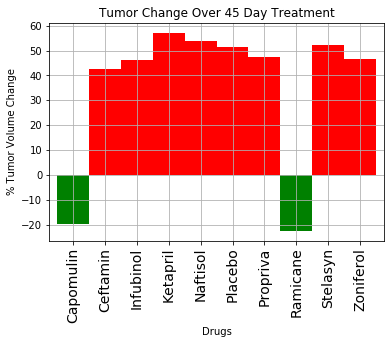

In [27]:
# Store all Relevant Percent Changes into a Tuple
t = tuple([summary])


# Splice the data between passing and failing drugs


summary = pd.DataFrame(summary)
summary['positive'] = summary[0] > 0
summary[0].plot(kind = 'bar',width=1.0, color = summary.positive.map({True: 'r', False:'g'}))
plt.xticks(fontsize=14)
plt.grid()

# Orient widths. Add labels, tick marks, etc. 
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume Change")
# Use functions to label the percentages of changes

    
    

# Call functions to implement the function calls


# Save the Figure
plt.savefig('summary.png')

# Show the Figure


![Metastatic Spread During Treatment](../Images/change.png)